In [56]:
import keras.models
import os
import sys
sys.path.append("../src")
import localmodule

dataset_name = localmodule.get_dataset_name()
models_dir = localmodule.get_models_dir()
model_name = "icassp-convnet"
aug_kind_str = "all"
model_name = "_".join([model_name, "aug-" + aug_kind_str])
model_dir = os.path.join(models_dir, model_name)
test_unit_str = "unit07"
unit_dir = os.path.join(model_dir, test_unit_str)
trial_id = 8
trial_str = "trial-" + str(trial_id)
trial_dir = os.path.join(unit_dir, trial_str)
network_name = "_".join([
    dataset_name,
    model_name,
    test_unit_str,
    trial_str,
    "network.hdf5"])
network_path = os.path.join(trial_dir, network_name)
model = keras.models.load_model(network_path)

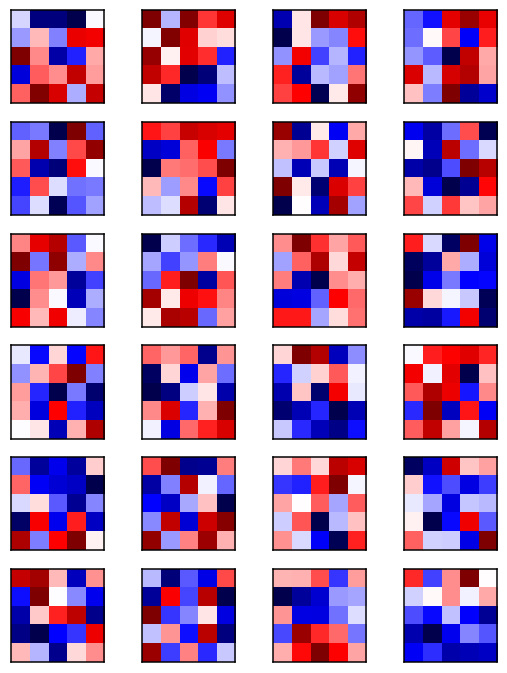

In [48]:
import matplotlib.patches
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

n_rows = 6
n_cols = 4
n_thumbnails = n_rows * n_cols
n_channels = 24

channels = range(n_channels)
matplotlib.rcParams['axes.linewidth'] = 1.5

for layer_id in [4]:#[2, 4, 6]:
    W = model.layers[layer_id].get_weights()[0]
    fig = plt.figure(figsize=(9, 12))
    for thumbnail_id, channel_id in enumerate(channels):
        ax = fig.add_subplot(n_rows, n_cols, (1+thumbnail_id))
        plt.imshow(W[:, :, 0, channel_id], cmap="seismic")
        ax.set_xticks([]) 
        ax.set_yticks([])

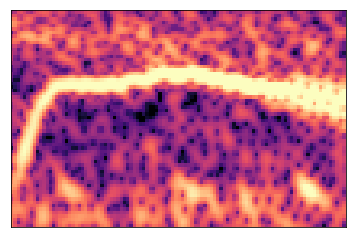

In [57]:
import h5py
from matplotlib import pyplot as plt
import numpy as np
from librosa.display import specshow
hdf5_path = "/beegfs/vl1019/spl2017_data/BirdVox-70k_logmelspec/original/BirdVox-70k_original_unit10.hdf5"
hdf5_file = h5py.File(hdf5_path, "r")
lms_container = hdf5_file["logmelspec"]
lms = lms_container["unit10_028365914_03304_1_original"].value
hdf5_file.close()
specshow(np.minimum(np.maximum(lms[:64, 121:(-120)], -35), -18), cmap="magma")
plt.savefig("logmelspec.eps")

In [58]:
trunc_lms = lms[np.newaxis, :, 121:(-120), np.newaxis]

NameError: name 'output7' is not defined

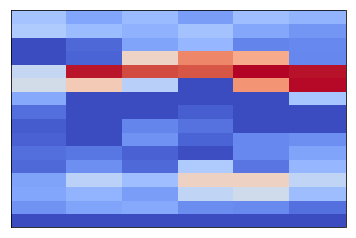

In [60]:
from keras import backend as K


get_output1 = K.function([model.layers[0].input, K.learning_phase()],
                        [model.layers[1].output])
output1 = get_output1([trunc_lms, 0])[0]
specshow(np.squeeze(output1[0, :64, :, 0]) - np.mean(output1))
plt.savefig("layer-1.eps")

for n in range(24):

    get_output3 = K.function([model.layers[0].input, K.learning_phase()],
                            [model.layers[3].output])
    output3 = get_output3([trunc_lms, 0])[0]
    specshow(np.squeeze(output3[0, :32, :, n]) - np.mean(output3))
    plt.savefig("layer-2_ch-" + str(n).zfill(2) + ".eps")

    get_output5 = K.function([model.layers[0].input, K.learning_phase()],
                            [model.layers[5].output])
    output5 = get_output5([trunc_lms, 0])[0]
    specshow(np.squeeze(output5[0, :16, :, n]) - np.mean(output5))
    plt.savefig("layer-3_ch-" + str(n).zfill(2) + ".eps")
    
    
    get_output7 = K.function([model.layers[0].input, K.learning_phase()],
                            [model.layers[7].output])
    output5 = get_output7([trunc_lms, 0])[0]
    specshow(np.squeeze(output7[0, :16, :, n]) - np.mean(output7))
    plt.savefig("layer-7_ch-" + str(n).zfill(2) + ".eps")


In [44]:
model.layers[7]

In [23]:
layer_output.shape

(1, 64, 26, 24)

In [ ]:
lms